# Text Analytics

## Introduction: 
The data set being used is data collected from BBC News Artciles. This includes the news article titles and the category or type of article that it was. This will be used to gather information from the titles

In [1]:
#import and load data set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_20newsgroups

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set() 

df = pd.read_csv("/Users/elizabethdombowsky/Desktop/MSDS 650 Analytics/week 7/bbc.csv")

In [2]:
df

,id,news,type
0,0,UK economy facing 'major risks'\n \n The UK ma...,business
1,1,Aids and climate top Davos agenda\n \n Climate...,business
2,2,Asian quake hits European shares\n \n Shares i...,business
3,3,India power shares jump on debut\n \n Shares i...,business
4,4,Lacroix label bought by US firm\n \n Luxury go...,business
...,...,...,...
2220,2220,Warning over Windows Word files\n \n Writing a...,tech
2221,2221,Fast lifts rise into record books\n \n Two hig...,tech
2222,2222,Nintendo adds media playing to DS\n \n Nintend...,tech
2223,2223,Fast moving phone viruses appear\n \n Security...,tech


# Prepare Data for Analysis

To prepare for the analysis we will take away any punctuation or reoccuring words to make the analysis smoother and easier

### First, Convert to lowercase

In [3]:
df['clean'] = df.news.apply(lambda x: " ".join(x.lower() for x in x.split()))
df.head(10)

,id,news,type,clean
0,0,UK economy facing 'major risks'\n \n The UK ma...,business,uk economy facing 'major risks' the uk manufac...
1,1,Aids and climate top Davos agenda\n \n Climate...,business,aids and climate top davos agenda climate chan...
2,2,Asian quake hits European shares\n \n Shares i...,business,asian quake hits european shares shares in eur...
3,3,India power shares jump on debut\n \n Shares i...,business,india power shares jump on debut shares in ind...
4,4,Lacroix label bought by US firm\n \n Luxury go...,business,lacroix label bought by us firm luxury goods g...
5,5,Insurance bosses plead guilty\n \n Another thr...,business,insurance bosses plead guilty another three us...
6,6,Turkey-Iran mobile deal 'at risk'\n \n Turkey'...,business,turkey-iran mobile deal 'at risk' turkey's inv...
7,7,Parmalat to return to stockmarket\n \n Parmala...,business,"parmalat to return to stockmarket parmalat, th..."
8,8,WorldCom director admits lying\n \n The former...,business,worldcom director admits lying the former chie...
9,9,Ebbers denies WorldCom fraud\n \n Former World...,business,ebbers denies worldcom fraud former worldcom c...


# Removing Web Addresses

#### Removing web addresses is important to do before removing punctuation because it may not be as reliable at removing these later. For example, .edu will look like edu which could come up as education or .gov would be gov. 

In [4]:
df['clean'] = df.clean.str.replace('\S+@\S+','') 
df['clean'] = df.clean.str.replace('http\S+','') 
df['clean'] = df.clean.str.replace('\S+.com','') 
df['clean'] = df.clean.str.replace('\S+.edu','') 
df.head(10)

,id,news,type,clean
0,0,UK economy facing 'major risks'\n \n The UK ma...,business,uk economy facing 'major risks' the uk manufac...
1,1,Aids and climate top Davos agenda\n \n Climate...,business,aids and climate top davos agenda climate chan...
2,2,Asian quake hits European shares\n \n Shares i...,business,asian quake hits european shares shares in eur...
3,3,India power shares jump on debut\n \n Shares i...,business,india power shares jump on debut shares in ind...
4,4,Lacroix label bought by US firm\n \n Luxury go...,business,lacroix label bought by us firm luxury goods g...
5,5,Insurance bosses plead guilty\n \n Another thr...,business,insurance bosses plead guilty another three us...
6,6,Turkey-Iran mobile deal 'at risk'\n \n Turkey'...,business,turkey-iran mobile deal 'at risk' turkey's inv...
7,7,Parmalat to return to stockmarket\n \n Parmala...,business,"parmalat to return to stockmarket parmalat, th..."
8,8,WorldCom director admits lying\n \n The former...,business,director admits lying the former chief financ...
9,9,Ebbers denies WorldCom fraud\n \n Former World...,business,ebbers denies fraud former chief bernie ebbe...


## Remove Punctuation

#### Now remove punctuation from data set since email addresses have been deleted 

In [5]:
df['clean'] = df.clean.str.replace('[^\w\s]','')
df.head(10)

,id,news,type,clean
0,0,UK economy facing 'major risks'\n \n The UK ma...,business,uk economy facing major risks the uk manufactu...
1,1,Aids and climate top Davos agenda\n \n Climate...,business,aids and climate top davos agenda climate chan...
2,2,Asian quake hits European shares\n \n Shares i...,business,asian quake hits european shares shares in eur...
3,3,India power shares jump on debut\n \n Shares i...,business,india power shares jump on debut shares in ind...
4,4,Lacroix label bought by US firm\n \n Luxury go...,business,lacroix label bought by us firm luxury goods g...
5,5,Insurance bosses plead guilty\n \n Another thr...,business,insurance bosses plead guilty another three us...
6,6,Turkey-Iran mobile deal 'at risk'\n \n Turkey'...,business,turkeyiran mobile deal at risk turkeys investm...
7,7,Parmalat to return to stockmarket\n \n Parmala...,business,parmalat to return to stockmarket parmalat the...
8,8,WorldCom director admits lying\n \n The former...,business,director admits lying the former chief financ...
9,9,Ebbers denies WorldCom fraud\n \n Former World...,business,ebbers denies fraud former chief bernie ebbe...


## Removing Digits

#### Remove digits and things like /n for new line 

In [6]:
df['text'] = df.clean.str.replace('\d+','')
df.head(10)

,id,news,type,clean,text
0,0,UK economy facing 'major risks'\n \n The UK ma...,business,uk economy facing major risks the uk manufactu...,uk economy facing major risks the uk manufactu...
1,1,Aids and climate top Davos agenda\n \n Climate...,business,aids and climate top davos agenda climate chan...,aids and climate top davos agenda climate chan...
2,2,Asian quake hits European shares\n \n Shares i...,business,asian quake hits european shares shares in eur...,asian quake hits european shares shares in eur...
3,3,India power shares jump on debut\n \n Shares i...,business,india power shares jump on debut shares in ind...,india power shares jump on debut shares in ind...
4,4,Lacroix label bought by US firm\n \n Luxury go...,business,lacroix label bought by us firm luxury goods g...,lacroix label bought by us firm luxury goods g...
5,5,Insurance bosses plead guilty\n \n Another thr...,business,insurance bosses plead guilty another three us...,insurance bosses plead guilty another three us...
6,6,Turkey-Iran mobile deal 'at risk'\n \n Turkey'...,business,turkeyiran mobile deal at risk turkeys investm...,turkeyiran mobile deal at risk turkeys investm...
7,7,Parmalat to return to stockmarket\n \n Parmala...,business,parmalat to return to stockmarket parmalat the...,parmalat to return to stockmarket parmalat the...
8,8,WorldCom director admits lying\n \n The former...,business,director admits lying the former chief financ...,director admits lying the former chief financ...
9,9,Ebbers denies WorldCom fraud\n \n Former World...,business,ebbers denies fraud former chief bernie ebbe...,ebbers denies fraud former chief bernie ebbe...


## Remove Stop Words

### Remove commonly occuring words from a predefined library 

In [7]:
from nltk.corpus import stopwords, words
stop = stopwords.words('english')

df['clean'] = df.clean.apply(lambda x: " ".join(w for w in x.split() if w not in stop))
df.head(10)

,id,news,type,clean,text
0,0,UK economy facing 'major risks'\n \n The UK ma...,business,uk economy facing major risks uk manufacturing...,uk economy facing major risks the uk manufactu...
1,1,Aids and climate top Davos agenda\n \n Climate...,business,aids climate top davos agenda climate change f...,aids and climate top davos agenda climate chan...
2,2,Asian quake hits European shares\n \n Shares i...,business,asian quake hits european shares shares europe...,asian quake hits european shares shares in eur...
3,3,India power shares jump on debut\n \n Shares i...,business,india power shares jump debut shares indias la...,india power shares jump on debut shares in ind...
4,4,Lacroix label bought by US firm\n \n Luxury go...,business,lacroix label bought us firm luxury goods grou...,lacroix label bought by us firm luxury goods g...
5,5,Insurance bosses plead guilty\n \n Another thr...,business,insurance bosses plead guilty another three us...,insurance bosses plead guilty another three us...
6,6,Turkey-Iran mobile deal 'at risk'\n \n Turkey'...,business,turkeyiran mobile deal risk turkeys investment...,turkeyiran mobile deal at risk turkeys investm...
7,7,Parmalat to return to stockmarket\n \n Parmala...,business,parmalat return stockmarket parmalat italian p...,parmalat to return to stockmarket parmalat the...
8,8,WorldCom director admits lying\n \n The former...,business,director admits lying former chief financial o...,director admits lying the former chief financ...
9,9,Ebbers denies WorldCom fraud\n \n Former World...,business,ebbers denies fraud former chief bernie ebbers...,ebbers denies fraud former chief bernie ebbe...


## Word Tokenization 

### Divide into a sequence 

In [8]:
tokens = ' '.join(df.clean).split()
tokens[:20]

['uk',
 'economy',
 'facing',
 'major',
 'risks',
 'uk',
 'manufacturing',
 'sector',
 'continue',
 'face',
 'serious',
 'challenges',
 'next',
 'two',
 'years',
 'british',
 'chamber',
 'merce',
 'bcc',
 'said']

### Look at the least frequent words and most frequent words before lemm3nization and then after lemmenization 

In [9]:
#Least frequent words before lemmenization 
freq = pd.Series(' '.join(df.clean).split()).value_counts().to_dict()

list(freq.items())[33859:]


[('rapes', 1),
 ('booze', 1),
 ('megane', 1),
 ('over18s', 1),
 ('1416', 1),
 ('407bn', 1),
 ('komileva', 1),
 ('419m', 1),
 ('rationalisation', 1),
 ('lena', 1),
 ('81bn', 1),
 ('yamane', 1),
 ('payer', 1),
 ('prebon', 1),
 ('twotier', 1),
 ('ofsquabbling', 1),
 ('improbability', 1),
 ('inefficiencies', 1),
 ('m3u', 1)]

Most of these words are not real words or are difficult to make out. Will look later at the least frequent words after lemmenization

In [10]:
#Least frequent words before lemmenization 
list(freq.items())[:20]

[('said', 7244),
 ('mr', 3004),
 ('would', 2554),
 ('also', 2141),
 ('people', 1954),
 ('new', 1942),
 ('us', 1886),
 ('one', 1733),
 ('year', 1598),
 ('could', 1505),
 ('last', 1380),
 ('first', 1272),
 ('years', 1223),
 ('two', 1153),
 ('time', 1142),
 ('government', 1020),
 ('world', 998),
 ('e', 977),
 ('uk', 955),
 ('make', 917)]

## Lemmenization

### Convert words into root words and then create a visualization with text analytics

In [11]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

#establish the lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/elizabethdombowsky/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
df['text'] = df.clean.apply(lambda x: " ".join(wordnet_lemmatizer.lemmatize(w) for w in x.split()))
df.head(10)

,id,news,type,clean,text
0,0,UK economy facing 'major risks'\n \n The UK ma...,business,uk economy facing major risks uk manufacturing...,uk economy facing major risk uk manufacturing ...
1,1,Aids and climate top Davos agenda\n \n Climate...,business,aids climate top davos agenda climate change f...,aid climate top davos agenda climate change fi...
2,2,Asian quake hits European shares\n \n Shares i...,business,asian quake hits european shares shares europe...,asian quake hit european share share europe le...
3,3,India power shares jump on debut\n \n Shares i...,business,india power shares jump debut shares indias la...,india power share jump debut share india large...
4,4,Lacroix label bought by US firm\n \n Luxury go...,business,lacroix label bought us firm luxury goods grou...,lacroix label bought u firm luxury good group ...
5,5,Insurance bosses plead guilty\n \n Another thr...,business,insurance bosses plead guilty another three us...,insurance boss plead guilty another three u in...
6,6,Turkey-Iran mobile deal 'at risk'\n \n Turkey'...,business,turkeyiran mobile deal risk turkeys investment...,turkeyiran mobile deal risk turkey investment ...
7,7,Parmalat to return to stockmarket\n \n Parmala...,business,parmalat return stockmarket parmalat italian p...,parmalat return stockmarket parmalat italian p...
8,8,WorldCom director admits lying\n \n The former...,business,director admits lying former chief financial o...,director admits lying former chief financial o...
9,9,Ebbers denies WorldCom fraud\n \n Former World...,business,ebbers denies fraud former chief bernie ebbers...,ebbers denies fraud former chief bernie ebbers...


## Text Analytics

### Look at common words and then create  a visualization based on most common words

### Create a frequency dictionary 

In [13]:
freq = pd.Series(' '.join(df.clean).split()).value_counts().to_dict()

list(freq.items())[:20]

[('said', 7244),
 ('mr', 3004),
 ('would', 2554),
 ('also', 2141),
 ('people', 1954),
 ('new', 1942),
 ('us', 1886),
 ('one', 1733),
 ('year', 1598),
 ('could', 1505),
 ('last', 1380),
 ('first', 1272),
 ('years', 1223),
 ('two', 1153),
 ('time', 1142),
 ('government', 1020),
 ('world', 998),
 ('e', 977),
 ('uk', 955),
 ('make', 917)]

All of these are words except for the letter e, this should be deleted because it is not a word 

In [14]:
remove = ' e '
df['clean'] = df.clean.str.replace(remove,'')

freq = pd.Series(' '.join(df.clean).split()).value_counts().to_dict()
list(freq.items())[:20]

[('said', 7226),
 ('mr', 3000),
 ('would', 2531),
 ('also', 2138),
 ('people', 1942),
 ('new', 1927),
 ('us', 1880),
 ('one', 1727),
 ('year', 1592),
 ('could', 1492),
 ('last', 1378),
 ('first', 1257),
 ('years', 1216),
 ('two', 1150),
 ('time', 1124),
 ('government', 1016),
 ('world', 997),
 ('uk', 952),
 ('make', 913),
 ('told', 911)]

Now that this has been deleted, there are quite a few other words as well. I will delete these too

In [15]:
#Remove words
remove = 'popl'
df['clean'] = df.clean.str.replace(remove,'')
freq = pd.Series(' '.join(df.clean).split()).value_counts().to_dict()

remove = 'yar'
df['clean'] = df.clean.str.replace(remove,'')
freq = pd.Series(' '.join(df.clean).split()).value_counts().to_dict()


remove = 'yars'
df['clean'] = df.clean.str.replace(remove,'')
freq = pd.Series(' '.join(df.clean).split()).value_counts().to_dict()

remove = 'govrnmnt'
df['clean'] = df.clean.str.replace(remove,'')
freq = pd.Series(' '.join(df.clean).split()).value_counts().to_dict()

remove = 'mak'
df['clean'] = df.clean.str.replace(remove,'')
freq = pd.Series(' '.join(df.clean).split()).value_counts().to_dict()

remove = "bst"
df['clean'] = df.clean.str.replace(remove,'')
freq = pd.Series(' '.join(df.clean).split()).value_counts().to_dict()

list(freq.items())[:20]

[('said', 7226),
 ('mr', 3000),
 ('would', 2531),
 ('also', 2138),
 ('people', 1942),
 ('new', 1927),
 ('us', 1880),
 ('one', 1727),
 ('year', 1592),
 ('could', 1492),
 ('last', 1378),
 ('first', 1257),
 ('years', 1216),
 ('two', 1150),
 ('time', 1124),
 ('government', 1016),
 ('world', 997),
 ('uk', 952),
 ('e', 916),
 ('told', 911)]

Remove process again

In [16]:
remove = ' s '
df['clean'] = df.clean.str.replace(remove,'')
freq = pd.Series(' '.join(df.clean).split()).value_counts().to_dict()

remove = 'nd'
df['clean'] = df.clean.str.replace(remove,'')
freq = pd.Series(' '.join(df.clean).split()).value_counts().to_dict()


remove = 'gt'
df['clean'] = df.clean.str.replace(remove,'')
freq = pd.Series(' '.join(df.clean).split()).value_counts().to_dict()

remove = 'lik'
df['clean'] = df.clean.str.replace(remove,'')
freq = pd.Series(' '.join(df.clean).split()).value_counts().to_dict()

remove = 'gam'
df['clean'] = df.clean.str.replace(remove,'')
freq = pd.Series(' '.join(df.clean).split()).value_counts().to_dict()

remove = 'ing'
df['clean'] = df.clean.str.replace(remove,'')
freq = pd.Series(' '.join(df.clean).split()).value_counts().to_dict()

remove = 'tak'
df['clean'] = df.clean.str.replace(remove,'')
freq = pd.Series(' '.join(df.clean).split()).value_counts().to_dict()

list(freq.items())[:20]

[('said', 7226),
 ('e', 3806),
 ('mr', 3000),
 ('would', 2531),
 ('us', 2205),
 ('also', 2138),
 ('people', 1942),
 ('new', 1927),
 ('one', 1727),
 ('year', 1592),
 ('could', 1492),
 ('last', 1390),
 ('first', 1257),
 ('years', 1216),
 ('es', 1214),
 ('go', 1213),
 ('two', 1150),
 ('time', 1124),
 ('government', 1016),
 ('world', 997)]

In [17]:
# Least Frequent Words
list(freq.items())[33539:]

[('aeroplane', 1),
 ('stewardess', 1),
 ('centfirst', 1),
 ('inferno', 1),
 ('disloyalty', 1),
 ('tryin', 1),
 ('topper', 1),
 ('masscre', 1),
 ('concurrent', 1),
 ('m3uunknown', 1)]

This looks so much better than before lemmenization. There are not any similiar words to before. In the before lemmenization, the word "rapes" was there. It is likely lemmenization turned it into rape and then it was fit with another word and moved up along the line. Lemmenization helps prevent words like this to be categorized alone when they are both the same word by getting the root word

Now that this looks better, this can be visualized 

## Visualization of Most Frequent Words

In [18]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, max_words=200).generate_from_frequencies(freq)

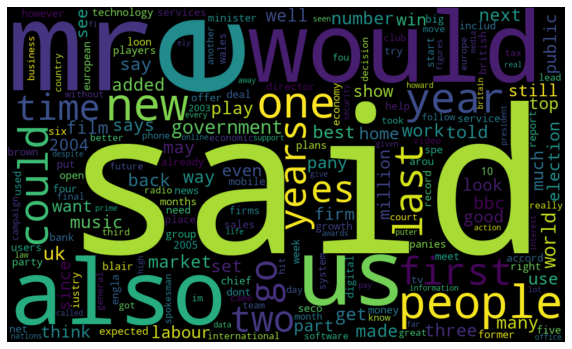

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

You can clearly see the top two words are mr and said and the rest of the words, even more than 20 are put in the background acording to their frequency

## Ngrams

### Recreate the tokens list 

In [20]:
tokens = ' '.join(df.clean).split()

###  Create bigrams and trigrams

### Bigrams with frequency distribution 

In [21]:
ngrams_2 = nltk.bigrams(tokens)

freq_2grams = pd.Series(ngrams_2).value_counts().to_dict()
list(freq_2grams.items())[:20]

[(('last', 'year'), 377),
 (('said', 'mr'), 359),
 (('told', 'bbc'), 347),
 (('mr', 'blair'), 294),
 (('prime', 'minister'), 273),
 (('mr', 'brown'), 214),
 (('chief', 'executive'), 196),
 (('said', 'would'), 190),
 (('bbc', 'news'), 178),
 (('general', 'election'), 166),
 (('last', 'week'), 164),
 (('six', 'nations'), 162),
 (('tony', 'blair'), 162),
 (('new', 'york'), 154),
 (('mr', 'howard'), 145),
 (('would', 'e'), 143),
 (('number', 'one'), 139),
 (('first', 'time'), 138),
 (('years', 'ago'), 126),
 (('human', 'rights'), 116)]

## Look at Trigrams

In [22]:
ngrams_3 = nltk.trigrams(tokens)

freq_3grams = pd.Series(ngrams_3).value_counts().to_dict()
list(freq_3grams.items())[:20]

[(('told', 'bbc', 'news'), 147),
 (('bbc', 'news', 'website'), 94),
 (('told', 'bbc', 'radio'), 76),
 (('bbc', 'radio', '4s'), 58),
 (('leader', 'michael', 'howard'), 55),
 (('mr', 'blair', 'said'), 54),
 (('radio', '4s', 'today'), 53),
 (('4s', 'today', 'programme'), 49),
 (('told', 'bbc', 'sport'), 48),
 (('million', 'dollar', 'baby'), 48),
 (('mr', 'howard', 'said'), 41),
 (('tory', 'leader', 'michael'), 41),
 (('next', 'general', 'election'), 37),
 (('leader', 'charles', 'kennedy'), 32),
 (('prime', 'minister', 'tony'), 32),
 (('two', 'years', 'ago'), 28),
 (('coach', 'ay', 'robinson'), 27),
 (('chancellor', 'gordon', 'brown'), 27),
 (('minister', 'tony', 'blair'), 26),
 (('mr', 'blair', 'told'), 26)]

### the tri-grams give the most information. There are definitely clear and understandable patterns in the trigrams like "bbc", "news", "website" and you can tell who the posts are talking about. 

## Part of Speech

In [23]:
from nltk.tag import pos_tag

pos_tags = pos_tag(tokens)
pos_tags[:20]

[('uk', 'JJ'),
 ('economy', 'NN'),
 ('fac', 'JJ'),
 ('major', 'JJ'),
 ('risks', 'NNS'),
 ('uk', 'JJ'),
 ('manufactur', 'NN'),
 ('sector', 'NN'),
 ('continue', 'VBP'),
 ('face', 'VBP'),
 ('serious', 'JJ'),
 ('challenges', 'NNS'),
 ('next', 'IN'),
 ('two', 'CD'),
 ('years', 'NNS'),
 ('british', 'JJ'),
 ('chamber', 'VBP'),
 ('merce', 'NN'),
 ('bcc', 'NN'),
 ('said', 'VBD')]

### Create frequency distribution for parts of speech

In [24]:
from collections import Counter

Counter([j for i,j in pos_tag(tokens)])

Counter({'JJ': 89954,
         'NN': 173612,
         'NNS': 62640,
         'VBP': 29189,
         'IN': 6171,
         'CD': 21949,
         'VBD': 34000,
         'JJS': 2307,
         'RB': 24366,
         'VBN': 11885,
         'VB': 10404,
         'FW': 877,
         'VBZ': 8826,
         'JJR': 1782,
         'NNP': 657,
         'WP$': 120,
         'MD': 5295,
         'PRP': 2237,
         'CC': 318,
         'DT': 963,
         'RBR': 1040,
         'RBS': 156,
         'RP': 330,
         '$': 104,
         'NNPS': 72,
         'WP': 59,
         'WDT': 71,
         'PRP$': 26,
         'WRB': 41,
         'PDT': 3,
         'POS': 4,
         'EX': 2,
         'UH': 10,
         'SYM': 5,
         'TO': 1})

### Topic Modeling 

unsupervised machine learning model to cluster words for a set of documents

In [25]:
lem_ls = list(df.clean.apply(lambda x: list(x.split())))
print(lem_ls[:2])

[['uk', 'economy', 'fac', 'major', 'risks', 'uk', 'manufactur', 'sector', 'continue', 'face', 'serious', 'challenges', 'next', 'two', 'years', 'british', 'chamber', 'merce', 'bcc', 'said', 'groups', 'quarterly', 'survey', 'panies', 'fou', 'exports', 'picked', 'last', 'three', 'months', '2004', 'best', 'levels', 'eight', 'years', 'rise', 'came', 'despite', 'exchange', 'rates', 'cited', 'major', 'concern', 'however', 'bcc', 'fou', 'whole', 'uk', 'economy', 'still', 'faced', 'major', 'risks', 'warned', 'growth', 'set', 'slow', 'recently', 'forecast', 'economic', 'growth', 'slow', '3', '2004', 'little', '25', '2005', '2006', 'manufacturers', 'domestic', 'sales', 'growth', 'fell', 'back', 'slightly', 'quarter', 'survey', '5196', 'firms', 'fou', 'employment', 'manufactur', 'also', 'fell', 'job', 'expectations', 'lowest', 'level', 'year', 'despite', 'positive', 'news', 'export', 'sector', 'worry', 'signs', 'manufactur', 'bcc', 'said', 'results', 'reinforce', 'concern', 'sectors', 'persistent'

### Use Gensim package 

In [26]:
import gensim
import gensim.corpora as corpora

### Create dictionary of the lemmatized words and a term document frequency for the data set

In [27]:
id2word = corpora.Dictionary(lem_ls)
corpus = [id2word.doc2bow(post) for post in lem_ls]

### Build the LDA Model 

In [28]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=42,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

### Look at the results of the LDA model 

In [29]:
# Print the Keyword in the 10 topics
print(lda_model.print_topics())

[(0, '0.013*"said" + 0.012*"eu" + 0.008*"government" + 0.006*"european" + 0.006*"us" + 0.006*"would" + 0.005*"tax" + 0.005*"economic" + 0.005*"mr" + 0.005*"could"'), (1, '0.014*"e" + 0.008*"said" + 0.005*"play" + 0.005*"one" + 0.005*"first" + 0.004*"world" + 0.004*"es" + 0.004*"best" + 0.004*"go" + 0.004*"time"'), (2, '0.011*"yukos" + 0.011*"said" + 0.007*"oil" + 0.007*"us" + 0.006*"russian" + 0.005*"pany" + 0.004*"gazprom" + 0.004*"best" + 0.004*"auction" + 0.004*"firm"'), (3, '0.016*"said" + 0.009*"sales" + 0.008*"year" + 0.007*"us" + 0.005*"last" + 0.005*"new" + 0.005*"would" + 0.005*"pany" + 0.005*"also" + 0.004*"market"'), (4, '0.014*"said" + 0.007*"year" + 0.007*"growth" + 0.005*"economy" + 0.005*"email" + 0.005*"rise" + 0.005*"figures" + 0.005*"rate" + 0.005*"us" + 0.005*"spam"'), (5, '0.024*"said" + 0.017*"mr" + 0.012*"would" + 0.008*"labour" + 0.007*"election" + 0.007*"government" + 0.006*"blair" + 0.006*"people" + 0.005*"party" + 0.005*"e"'), (6, '0.010*"said" + 0.004*"china"

Top words are film, said, also, films, show, actor, director, star, us, and include. This is really interesting since BBC is a news app. There may be a lot of information about movie stars and movies coming out. 

## Evaluation of Model 

### Let's evaluate the accuracy of the model 

## Optimization and Test Accuracy

use c_v for coherence model 

In [30]:
from gensim.models import CoherenceModel

# compute the coherence score
coherence_model_lda = CoherenceModel(model=lda_model, 
                                     texts=lem_ls, 
                                     dictionary=id2word, 
                                     coherence='c_v')

# retreive the coherence_scores
coherence_lda = coherence_model_lda.get_coherence()

print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.39830994075819365


.45 is not that good on a scale to 1, however the number of topics was randomly selected. Let's see the best number of topics

In [31]:
## Optimize Model 

Set the topics from 2 to 15 and compute the coherence scores 

In [32]:

scores = []
for i in range(2,15):
    print(f'Calcuting for {i} topics')
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=i, 
                                       random_state=42,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, 
                                         texts=lem_ls, 
                                         dictionary=id2word, 
                                         coherence='c_v')

    
    coherence_lda = coherence_model_lda.get_coherence()
    
    scores.append((i,coherence_lda))


Calcuting for 2 topics
Calcuting for 3 topics
Calcuting for 4 topics
Calcuting for 5 topics
Calcuting for 6 topics
Calcuting for 7 topics
Calcuting for 8 topics
Calcuting for 9 topics
Calcuting for 10 topics
Calcuting for 11 topics
Calcuting for 12 topics
Calcuting for 13 topics
Calcuting for 14 topics


In [33]:
scores

[(2, 0.3144340640533852),
 (3, 0.29639315226968704),
 (4, 0.3263438997775753),
 (5, 0.38323723842677293),
 (6, 0.32766741257950266),
 (7, 0.35673874645519305),
 (8, 0.4232328486049304),
 (9, 0.36846103979212613),
 (10, 0.41165336994014246),
 (11, 0.3849318771935699),
 (12, 0.3764949257775481),
 (13, 0.3783086337107855),
 (14, 0.371807432906591)]

The best score is 8 topics at .48. This is ok but not great, let's choose other parameters to increase the score by creating a best fit model 

### Create best fit model 

In [34]:
bf_lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=8, 
                                       random_state=42,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

## Visualizing the Topics

In [35]:
import pyLDAvis.gensim 
import gensim

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [36]:
# Packages necessry to support the visualization of the topic model
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim.prepare(bf_lda_model, corpus, id2word)

## Print the topics and words 

In [43]:
print(LDAvis_prepared)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.022332  0.141715       1        1  35.308761
5      0.105915  0.035822       2        1  21.189043
4      0.078509 -0.020381       3        1  12.198442
3     -0.035757 -0.069327       4        1  10.114596
0     -0.001413 -0.140947       5        1   7.050444
7      0.059219 -0.012797       6        1   6.332865
2     -0.186495  0.031140       7        1   4.715257
6     -0.042310  0.034774       8        1   3.090593, topic_info=          Term         Freq        Total Category  logprob  loglift
110       said  6708.000000  6708.000000  Default  30.0000  30.0000
2428      film   711.000000   711.000000  Default  29.0000  29.0000
16        best   704.000000   704.000000  Default  28.0000  28.0000
589   software   569.000000   569.000000  Default  27.0000  27.0000
3963    search   334.000000   334.000000  Default  26.0000  26.0000
...      

In [ ]:
# Saving the visualization to a html. Open this in another browser window
pyLDAvis.save_html(LDAvis_prepared,'topic_model_viz.html')

#### Insights

Insights from the visualization are that the most common words are surrounded by film, government, and big name companies, this is the largest topic, topic #1. Topic #2 is mainly comprised of internet, access, and governemnt. Topic #3 is most frequent at election, economy, and president/prime minister. Topic #4 is comprised of market, shares, executive. So looking at the stock market. 

Overall the main themes are the government, films, the interent, economy, and the stock market. 

Summary:
- Major themes from the words in the topics are government, films, the interent, economy, and the stock market
- Top Ten most frequent words:
    "said, mr, would, us, also, people, new, one, year, could, last, first"
- Least Frequent words: 
    "aeroplane, stewardess, centfirst, inferno, disloyalty, tryin, topper, masscre, concurrent, m3uunknown"
- Best number of topics for the mdoel is 8 
    
